In [3]:
import pysftp
import os 
import numpy as np
import pandas as pd
import netCDF4
import numpy as np

from scipy import io
from classes.matlab_reader import matlab_reader
from classes.grid_funcs import map_grid,dataset,data_wizard
from dotenv import load_dotenv   #for python-dotenv method
import datetime

load_dotenv() 

Hostname = "eepc-0184.bath.ac.uk"
Username = "jmdomd20"
Password = os.environ.get('PASSWORD')

grid = map_grid(grid_size='125', source='airs')
wizard = data_wizard()

/Users/joaojesus/opt/anaconda3/envs/geo_plotting/lib/python3.8/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [ ]:
download_flag = True
if download_flag:
    for year in range(2003,2003+1):

        with pysftp.Connection(host=Hostname, username=Username, password=Password) as sftp:
            print("Connection successfully established ... ")
            # Switch to a remote directory
            sftp.cwd(f'/data3/AIRS/Climatology/125km_grid/{year}')

            # Obtain structure of the remote directory '/opt'
            directory_structure = sftp.listdir_attr()

            # # Print data
            # for attr in directory_structure:
            #     print(attr.filename, attr)
            
            for i in range(len(directory_structure)):
                    file_name = directory_structure[i].filename

                    year = int(file_name[:4])
                    month = int(file_name[4:6])
                    day = int(file_name[6:8])
                    date = f"{year}-{month}-{day}"

                    print(f"downloading.... {file_name} for this date: {date}")
                    sftp.get(file_name) 

                    print('download complete')

                    matlab = matlab_reader(file_name)

                    # data_tp = matlab.select(hemisphere= 'nh',data_field='tp',daytime='night',altitude=1)   
                    data_bg = matlab.select(hemisphere= 'nh',data_field='bg',daytime='night',altitude=1)   
                    data_a = matlab.select(hemisphere= 'nh',data_field='a',daytime='night',altitude=1)   
                    data_ha = matlab.select(hemisphere= 'nh',data_field='ha',daytime='night',altitude=1)   
                    data_k = matlab.select(hemisphere= 'nh',data_field='k',daytime='night',altitude=1)   
                    data_l = matlab.select(hemisphere= 'nh',data_field='l',daytime='night',altitude=1)   
                    data_m = matlab.select(hemisphere= 'nh',data_field='m',daytime='night',altitude=1)   
                    data_mfx = matlab.select(hemisphere= 'nh',data_field='mfx',daytime='night',altitude=1)   
                    data_mfy = matlab.select(hemisphere= 'nh',data_field='mfy',daytime='night',altitude=1)   

                    select_area_indexer = grid.select_area_indexer(min_lat= 55,max_lat= 65,min_lon= -180,max_lon= 180)

                    # data_tp = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_tp)
                    data_bg = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_bg)
                    data_a = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_a) 
                    data_ha = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_ha)   
                    data_k = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_k)
                    data_l = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_l)
                    data_m = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_m)
                    data_mfx = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_mfx) 
                    data_mfy = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_mfy) 

                    # np.savez_compressed(f"processed_airs_sftp/tp/{date}_tp.npz", data_tp)
                    np.savez_compressed(f"processed_airs_sftp/bg/{date}_bg.npz", data_bg)
                    np.savez_compressed(f"processed_airs_sftp/A/{date}_a.npz", data_a)
                    np.savez_compressed(f"processed_airs_sftp/ha/{date}_ha.npz", data_ha)
                    np.savez_compressed(f"processed_airs_sftp/k/{date}_k.npz", data_k)
                    np.savez_compressed(f"processed_airs_sftp/l/{date}_l.npz", data_l)
                    np.savez_compressed(f"processed_airs_sftp/m/{date}_m.npz", data_m)
                    np.savez_compressed(f"processed_airs_sftp/mfx/{date}_mfx.npz", data_mfx)
                    np.savez_compressed(f"processed_airs_sftp/mfy/{date}_mfy.npz", data_mfy)

                    print('delete file')
                    print(100*(i+1/len(directory_structure)),' % complete')
                    os.remove(file_name)




/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_64322/506410488.py:19: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(grid.nh_lon, grid.nh_lat, data,latlon=True, cmap='RdBu_r',shading='auto')


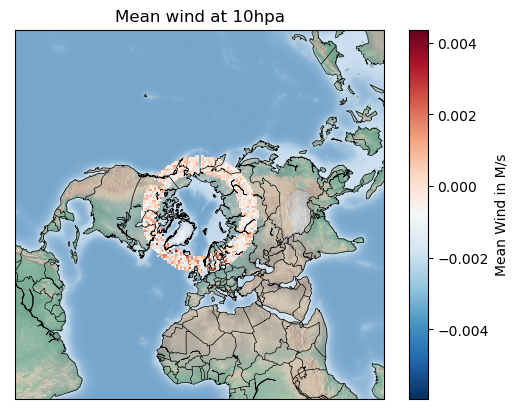

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

data = np.load('processed_airs_sftp/mfx/2002-10-10_mfx.npz')['arr_0']
grid = map_grid(grid_size='125', source='airs')
wizard = data_wizard()

fig = plt.figure()

m = Basemap(projection='npstere',boundinglat=0,lon_0=0,resolution='c')
m.shadedrelief(scale=0.5)

# use to plot areas in any section of the globe using a stereographic projection
# m = Basemap(projection='stere',llcrnrlat=-80,urcrnrlat=80,\
#             llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

m.pcolormesh(grid.nh_lon, grid.nh_lat, data,latlon=True, cmap='RdBu_r',shading='auto')
m.drawcoastlines(linewidth=0.5,linestyle='solid')
m.drawcountries(linewidth=0.5, linestyle='solid',color='k')


plt.title(f'Mean wind at 10hpa')
plt.colorbar(label='Mean Wind in M/s')
